In [1]:
import jax
import jax.numpy as jnp
import jax.scipy as jsp
from jax import jit
from jax import grad
from jax import vmap
from jax import jacobian
from jax import jacfwd, jacrev
from jax import hessian
from jax import vjp
from jax.lax import scan
# plotting
import matplotlib.pyplot as plt

Now we discuss the holomorphic property of the action and flow.

$\providecommand{\d}{\mathrm{d}}$
$\providecommand{\D}{\mathcal{D}}$

$$
\frac{\d z}{\d \tau} = \overline{\frac{\partial S_{\rm eff}}{\partial z}}
$$

Here the effective action $S_{\rm eff}(z)$ itself is holomorphic with respect to $z$.

But the flow equation is not holomorphic, and the next position $z_{n+1}$ is not a holomorphic function of $z_n$, where
$$
z_{n+1} = z_n + \Delta\tau \overline{\frac{\partial S_{\rm eff}}{\partial z_n}}
$$

Thus, the $z_{n}(x)$ would not be a holomorphic with respect to $x$ in general.

In [2]:
def action_iphi(z):
    z2 = jnp.dot(z, z)
    iphi = 1j*z2
    return iphi

def action_h(z):
    s = action_iphi(z)
    h = jnp.real(s) + 0.0j
    return h

def action_Seff(z):
    seff = -action_iphi(z)
    return seff

def integrand(z):
    return jnp.exp(action_iphi(z))

# corresponding gradients
grad_Seff = grad(action_Seff, holomorphic=True)

In [41]:
def flow_step(z, ds):
    dSdz = jnp.conj(grad_Seff(z))
    z = z + ds*dSdz
    return z

def flow_n_steps(x, ds, n_step):
    z = x.astype(complex)
    fnc = lambda z, null: (flow_step(z, ds), null)
    z, null = scan(fnc, z, length=n_step)
    return z

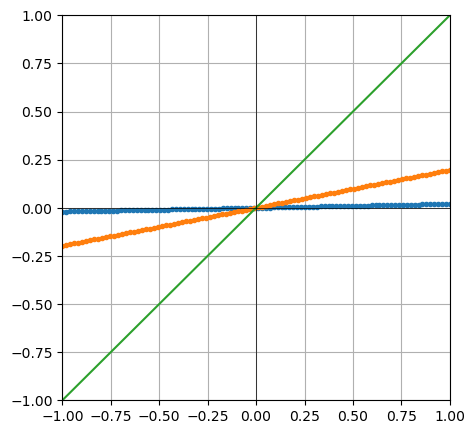

In [42]:
x = jnp.linspace(-1, 1, 100)
plt.figure(figsize=(5,5))
z = vmap(flow_n_steps, in_axes=(0, None, None))(x, 1e-3, 10)
plt.plot(z.real, z.imag, marker='.')
z = vmap(flow_n_steps, in_axes=(0, None, None))(x, 1e-3, 100)
plt.plot(z.real, z.imag, marker='.')
z = vmap(flow_n_steps, in_axes=(0, None, None))(x, 1e-3, 6000)
plt.plot(z.real, z.imag, marker='.')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.ylim(-1, 1)
plt.xlim(-1, 1)
plt.grid()
plt.show()

In [43]:
hess_Seff = hessian(action_Seff, holomorphic=True)

In [44]:
def flow_step2(z, ds):
    dSdz = jnp.conj(grad_Seff(z))
    h = hess_Seff(z)
    z = z + ds*dSdz/jnp.conj(h)*1j
    return z

def flow_n_steps2(x, ds, n_step):
    z = x.astype(complex)
    fnc = lambda z, null: (flow_step2(z, ds), null)
    z, null = scan(fnc, z, length=n_step)
    return z

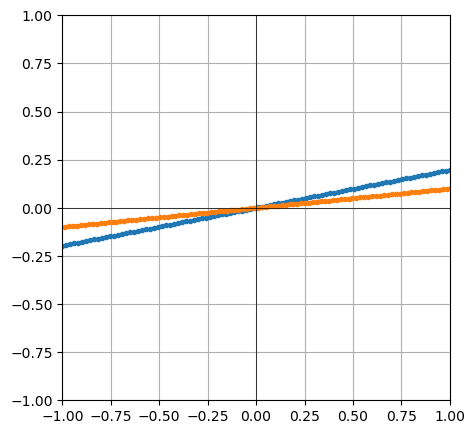

In [46]:
x = jnp.linspace(-1, 1, 100)
z1= vmap(flow_n_steps, in_axes=(0, None, None))(x, 1e-3, 100)
z2= vmap(flow_n_steps2, in_axes=(0, None, None))(x, 1e-3, 100)

plt.figure(figsize=(5,5))
plt.plot(z1.real, z1.imag, marker='.')
plt.plot(z2.real, z2.imag, marker='.')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.ylim(-1, 1)
plt.xlim(-1, 1)
plt.grid()
plt.show()